# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Create empty pandas DataFrame with proper column headings
city_weather = pd.DataFrame({'City': cities,
                             'Lat': '',
                             'Lng':'',
                             'Max Temp':'',
                             'Humidity': '',
                             'Cloudiness': '',
                             'Windspeed': "",
                             'Country':'',
                             'Date': ''})
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,constitucion,,,,,,,,
1,kaitangata,,,,,,,,
2,port elizabeth,,,,,,,,
3,onda,,,,,,,,
4,presidencia roque saenz pena,,,,,,,,


In [24]:
# Set parameters and base url
params = {'units':'Imperial','APPID':weather_api_key}
base_url= 'http://api.openweathermap.org/data/2.5/weather?'

# Set count to keep track of my running code
city_count = 0
set_count = 1

print("-----------------------\nBeginning Data Retrieval\n-----------------------")

# Run through all rows in my DF
for index, row in city_weather.iterrows():
    # Grab "City" column of every Index/Row
    this_city = row['City']
    # Add data and put it inside "params" dictionary
    params['q'] = str(this_city)
    # Read URL with json
    response = requests.get(base_url,params=params).json()
    # On error, keep going 
    try:
        # Grab necessary information from json data
        latitude = response['coord']['lat']        
        longitude = response['coord']['lon']
        temparature = response['main']['temp_max']
        humidity = response['main']['humidity']
        windspeed = response['wind']['speed']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date= response['dt']
        
        # Place data into DataFrame
        city_weather.loc[index,'Lat']=latitude
        city_weather.loc[index,'Lng']=longitude
        city_weather.loc[index,'Max Temp']=temparature
        city_weather.loc[index,'Humidity']=humidity
        city_weather.loc[index,'Cloudiness']=cloudiness
        city_weather.loc[index,'Windspeed']=windspeed
        city_weather.loc[index,'Country']=country        
        city_weather.loc[index,'Date']=date
        # Count in sets of 50
        if city_count > 50:
            city_count = 1
            set_count += 1
        else:
            city_count += 1
        print(f"Processing Record {city_count} of Set {set_count} | {this_city}")
        # Pause code so it doens't break
        time.sleep(.25)       
    # Skip these possible issues
    except (KeyError, IndexError):
        print(f'Not Found')
# Print notification when done
print("-----------------------\nData Retrieval Complete\n-----------------------")

-----------------------
Beginning Data Retrieval
-----------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | onda
Processing Record 5 of Set 1 | presidencia roque saenz pena
Processing Record 6 of Set 1 | esperance
Processing Record 7 of Set 1 | kalmunai
Not Found
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | sinegorye
Not Found
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | mitsamiouli
Processing Record 15 of Set 1 | alihe
Processing Record 16 of Set 1 | emerald
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | nizhniy odes
Processing Record 21 of Set 1 | piacabucu
Processing Record 22

Processing Record 39 of Set 4 | port macquarie
Processing Record 40 of Set 4 | kongolo
Processing Record 41 of Set 4 | cortez
Processing Record 42 of Set 4 | santa rosa
Processing Record 43 of Set 4 | aasiaat
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | gazanjyk
Processing Record 46 of Set 4 | vershino-darasunskiy
Processing Record 47 of Set 4 | plettenberg bay
Processing Record 48 of Set 4 | miracema do tocantins
Processing Record 49 of Set 4 | faya
Processing Record 50 of Set 4 | nemuro
Processing Record 51 of Set 4 | comodoro rivadavia
Processing Record 1 of Set 5 | ramsi
Processing Record 2 of Set 5 | amelia
Not Found
Processing Record 3 of Set 5 | wilmington island
Processing Record 4 of Set 5 | kuytun
Processing Record 5 of Set 5 | namibe
Processing Record 6 of Set 5 | niquero
Processing Record 7 of Set 5 | vila velha
Processing Record 8 of Set 5 | san andres
Processing Record 9 of Set 5 | terrace bay
Processing Record 10 of Set 5 | emba
Processing Rec

Processing Record 31 of Set 8 | plovdiv
Processing Record 32 of Set 8 | truth or consequences
Not Found
Processing Record 33 of Set 8 | vage
Processing Record 34 of Set 8 | macklin
Processing Record 35 of Set 8 | huainan
Processing Record 36 of Set 8 | suntar
Processing Record 37 of Set 8 | lamas
Processing Record 38 of Set 8 | smolenka
Processing Record 39 of Set 8 | wainwright
Processing Record 40 of Set 8 | serro
Processing Record 41 of Set 8 | hargeysa
Processing Record 42 of Set 8 | matara
Processing Record 43 of Set 8 | clyde river
Processing Record 44 of Set 8 | akyab
Processing Record 45 of Set 8 | logrono
Processing Record 46 of Set 8 | malchevskaya
Processing Record 47 of Set 8 | teya
Processing Record 48 of Set 8 | kentville
Not Found
Processing Record 49 of Set 8 | svetlogorsk
Processing Record 50 of Set 8 | genhe
Processing Record 51 of Set 8 | tyazhinskiy
Processing Record 1 of Set 9 | natchitoches
Processing Record 2 of Set 9 | korla
Processing Record 3 of Set 9 | la ser

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Remove all rows where no data was found
new_city_weather = city_weather.loc[(city_weather['Max Temp']!=''),:]
new_city_weather.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,constitucion,-35.33,-72.42,59.32,78,0,7,CL,1589764320
1,kaitangata,-46.28,169.85,53.69,62,5,8.37,NZ,1589764320
2,port elizabeth,-33.92,25.57,57.2,87,100,4.7,ZA,1589764321
3,onda,39.97,-0.25,59,79,0,3.69,ES,1589764321
4,presidencia roque saenz pena,-26.79,-60.44,61.3,54,0,6.11,AR,1589764322


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [106]:
# Removew all rows where Humidity is greater then 100
clean_city_weather = new_city_weather.loc[new_city_weather['Humidity'] < 100,:]
clean_city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,constitucion,-35.33,-72.42,59.32,78,0,7,CL,1589764320
1,kaitangata,-46.28,169.85,53.69,62,5,8.37,NZ,1589764320
2,port elizabeth,-33.92,25.57,57.2,87,100,4.7,ZA,1589764321
3,onda,39.97,-0.25,59,79,0,3.69,ES,1589764321
4,presidencia roque saenz pena,-26.79,-60.44,61.3,54,0,6.11,AR,1589764322


In [107]:
# Extract relevant fields from the data frame
clean_city_weather.drop(columns = ['Date'],inplace = True)

# Export the City_Data into a csv
clean_city_weather.to_csv(output_data_file)

clean_city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country
0,constitucion,-35.33,-72.42,59.32,78,0,7,CL
1,kaitangata,-46.28,169.85,53.69,62,5,8.37,NZ
2,port elizabeth,-33.92,25.57,57.2,87,100,4.7,ZA
3,onda,39.97,-0.25,59,79,0,3.69,ES
4,presidencia roque saenz pena,-26.79,-60.44,61.3,54,0,6.11,AR
...,...,...,...,...,...,...,...,...
605,fram,-26.98,-55.88,56.41,68,0,3.62,PY
606,kamenka,51.32,42.77,52,76,100,3,RU
607,severnoye,56.35,78.36,67.71,53,82,5.99,RU
608,murgab,37.5,61.97,70.29,42,90,19.75,TM


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

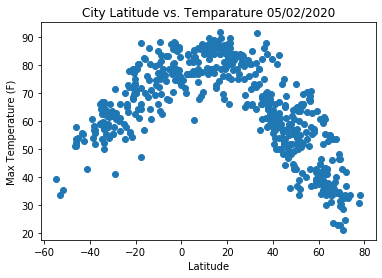

In [108]:
# Scatter plot Latitude vs. Temperature
x_values = clean_city_weather['Lat']
y_values = clean_city_weather['Max Temp']
plt.title('City Latitude vs. Temparature 05/02/2020')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

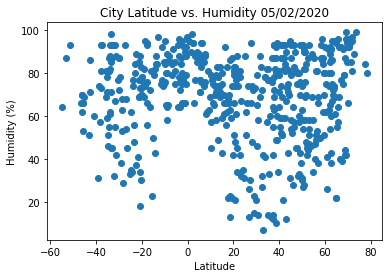

In [109]:
# Scatter plot Latitude vs. Humidity
x_values = clean_city_weather['Lat']
y_values = clean_city_weather['Humidity']
plt.title('City Latitude vs. Humidity 05/02/2020')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

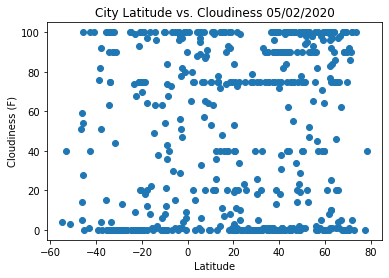

In [110]:
# Scatter plot Latitude vs. Cloudiness
x_values = clean_city_weather['Lat']
y_values = clean_city_weather['Cloudiness']
plt.title('City Latitude vs. Cloudiness 05/02/2020')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (F)')
plt.show()

## Latitude vs. Wind Speed Plot

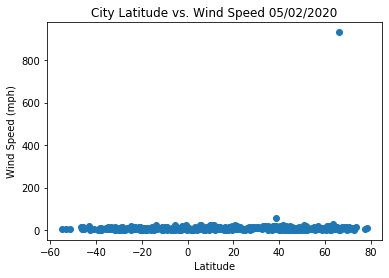

In [111]:
# Scatter plot Latitude vs. Wind Speed
x_values = clean_city_weather['Lat']
y_values = clean_city_weather['Windspeed']
plt.title('City Latitude vs. Wind Speed 05/02/2020')
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

## Linear Regression

In [112]:
# OPTIONAL: Create a function to create Linear Regression plots

In [113]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


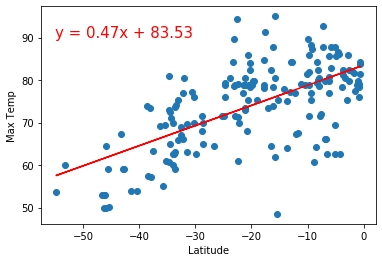

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


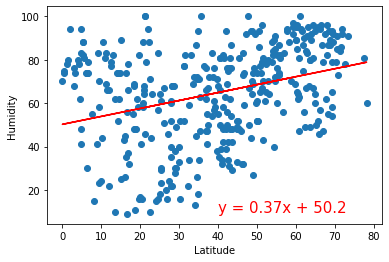

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


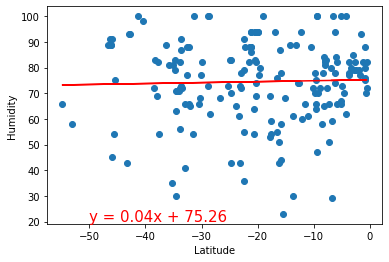

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


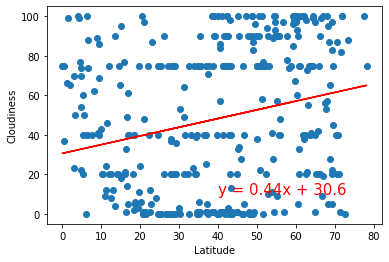

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


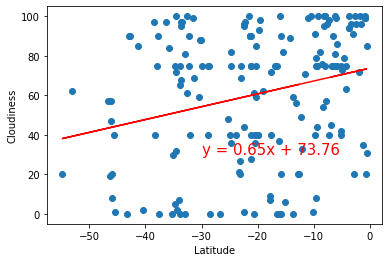

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


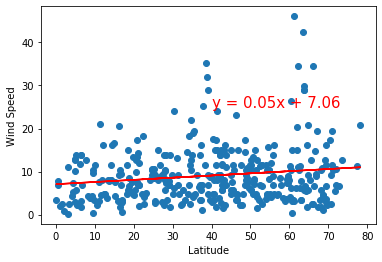

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


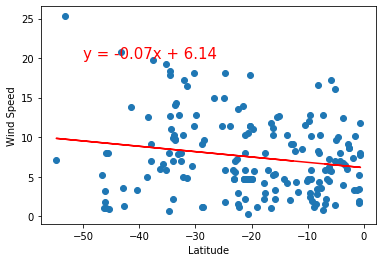